#### Simpliest Example with one QPU node and one CPU node in a hybrid cloud. 

In [7]:
# main.py

from HybridCloud import *

PRINTLOG = False
# Devices
ibm_kawasaki = IBM_Kawasaki(env=None, name="QPU-1", printlog = PRINTLOG)
ibm_kyiv = IBM_Kyiv(env=None, name="QPU-2", printlog = PRINTLOG)
cpu1 = CPU("CPU-1", env=None)
cpu2 = CPU("CPU-2", env=None)

# Hybrid environment
sim_env = HybridCloudSimEnv(
    qpu_devices = [ibm_kawasaki, ibm_kyiv],
    cpu_devices = [cpu1, cpu2],
    broker_class = ParallelBroker,
    job_feed_method = 'dispatcher',
    file_path = 'synth_job_batches/1000-job.csv', 
    job_generation_model = None, 
    printlog = PRINTLOG
)

sim_env.run()

0.00: SIMULATION STARTED
1098.27: SIMULATION ENDED


In [8]:
# from viz import plot_all

job_records = sim_env.job_records_manager.get_job_records()
# plot_all(job_records)

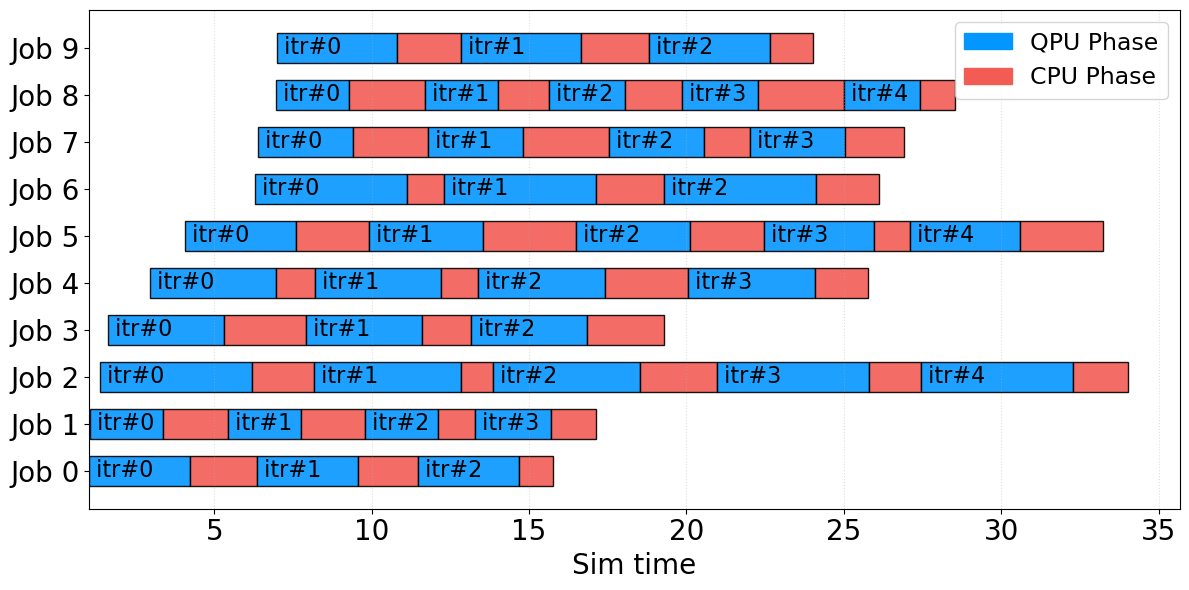

<Figure size 640x480 with 0 Axes>

In [9]:
first_ten = dict(list(job_records.items())[:10])
plot_all(first_ten, 10)
plt.savefig("results/job_phases.png", dpi=300, bbox_inches="tight")

In [10]:
results = calculate_device_usage_units(job_records, sim_env)
print(results)

{'time': 1098.27, 'qpu_util_percent': 77.25, 'cpu_util_percent': 31.57, 'mem_bw_util_percent': 45.27, 'qpu_units_time': 215493.14, 'cpu_units_time': 69335.38, 'mem_bw_time': 198877.9, 'qpu_units_capacity': 254, 'cpu_units_capacity': 200, 'mem_bw_capacity': 400}


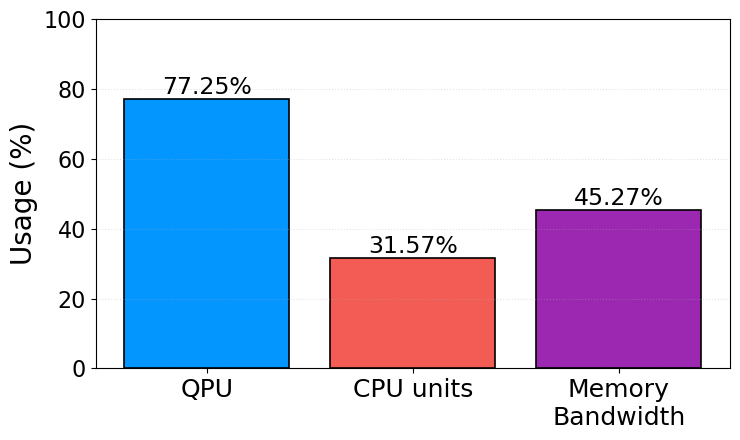

<Figure size 640x480 with 0 Axes>

In [11]:
plot_hybrid_utilization(results)
plt.savefig("results/usage.png", dpi=300, bbox_inches="tight")

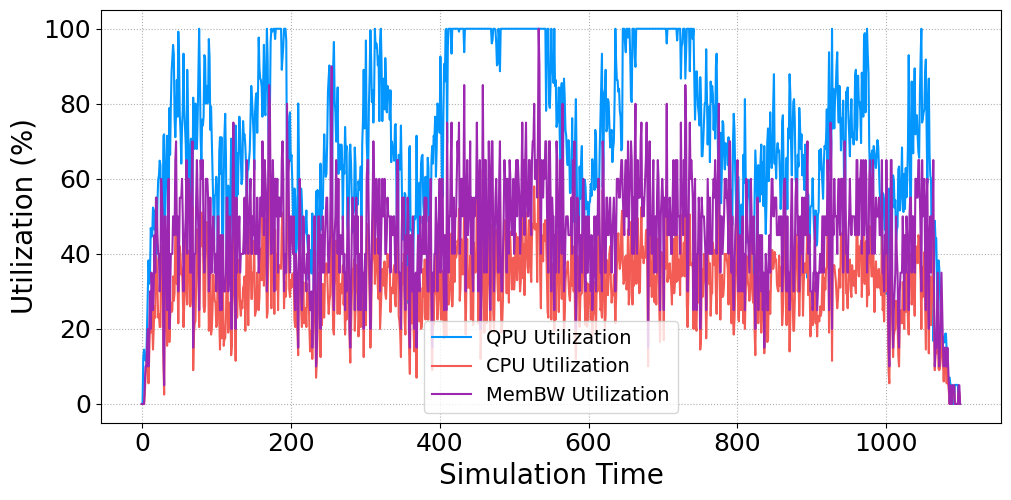

<Figure size 640x480 with 0 Axes>

In [12]:
time_points, qpu_util, cpu_util, mem_util = utilization_time_series(job_records, 256, 200, 400, step = 1.0)
plot_utilization_over_time(time_points, qpu_util, cpu_util, mem_util)
plt.savefig("results/usage_timeline.png", dpi=300, bbox_inches="tight")